In [5]:
import pandas as pd # for data wrangling
import numpy as np # for algebric calculations 
import seaborn as sns # for plotting 
import matplotlib.pyplot as plt # for plotting
import plotly.express as px # for plotting
import datetime # for working with datetime data

%matplotlib inline 

In [6]:
# read the data 
df = pd.read_excel("specimenDate_ageDemographic-unstacked.xlsx")

In [7]:
# data pre-processing
df['Total cases']=df.iloc[:,4:24].sum(axis=1)
df['cummulative total cases'] = df['Total cases'].cumsum()
df['daily_change'] = df['cummulative total cases'].pct_change(1)
df.drop(df.iloc[:, 4:69], inplace=True, axis=1)
df.drop(df.iloc[:, 0:2], inplace=True, axis=1)
df = df.drop_duplicates(subset=['areaName', 'date'])
df = df.sort_values('date')

In [8]:
# a look at the final pre-processed data
df.head()

,areaName,date,Total cases,cummulative total cases,daily_change
76603,Yorkshire and The Humber,2020-01-30,2,5961023,3.355130e-07
75530,England,2020-01-30,4,1773810,2.255038e-06
3077,York,2020-01-30,2,102485,1.951543e-05
75807,United Kingdom,2020-01-30,4,3579640,1.117432e-06
75531,England,2020-01-31,0,1773810,0.000000e+00


In [11]:
# Print the list of available areas to select from 
places = list(df['areaName'].unique())

In [15]:
places

['Hartlepool',
 'Middlesbrough',
 'Redcar and Cleveland',
 'Stockton-on-Tees',
 'Darlington',
 'Halton',
 'Warrington',
 'Blackburn with Darwen',
 'Blackpool',
 'Kingston upon Hull, City of',
 'East Riding of Yorkshire',
 'North East Lincolnshire',
 'North Lincolnshire',
 'York',
 'Derby',
 'Leicester',
 'Rutland',
 'Nottingham',
 'Herefordshire, County of',
 'Telford and Wrekin',
 'Stoke-on-Trent',
 'Bath and North East Somerset',
 'Bristol, City of',
 'North Somerset',
 'South Gloucestershire',
 'Plymouth',
 'Torbay',
 'Swindon',
 'Peterborough',
 'Luton',
 'Southend-on-Sea',
 'Thurrock',
 'Medway',
 'Bracknell Forest',
 'West Berkshire',
 'Reading',
 'Slough',
 'Windsor and Maidenhead',
 'Wokingham',
 'Milton Keynes',
 'Brighton and Hove',
 'Portsmouth',
 'Southampton',
 'Isle of Wight',
 'County Durham',
 'Cheshire East',
 'Cheshire West and Chester',
 'Shropshire',
 'Cornwall and Isles of Scilly',
 'Wiltshire',
 'Bedford',
 'Central Bedfordshire',
 'Northumberland',
 'Bournemouth,

Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.
2020-04-12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



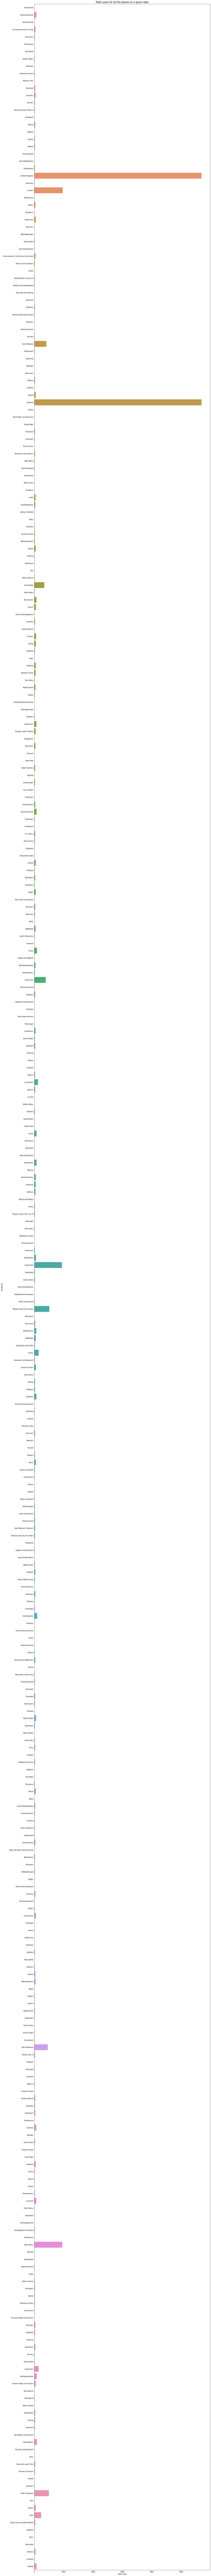

In [25]:
# given a date print total cases in all the regions 
print("Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.")
date = input()
df1 = df.loc[df['date'] == date]

x = df1['Total cases']
y = df1['areaName']

fig, ax = plt.subplots(figsize=(20,300))
sns.barplot(x,y,ax=ax)
plt.show()

Kindly enter a place from the list of places provided
Hartlepool
Kindly enter the starting date
2020-05-12
Kindly enter the ending date
2020-05-23


<ipython-input-12-3d1d24e833d3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date']).dt.date
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


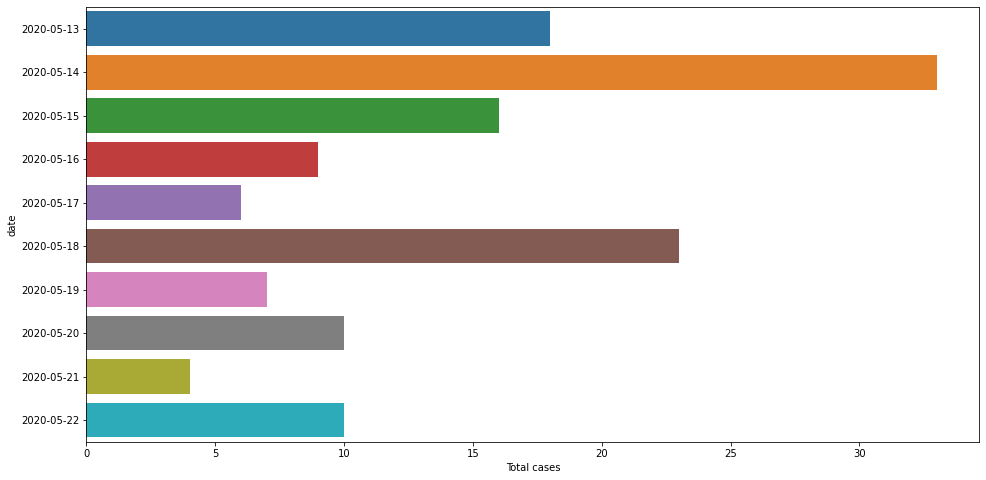

In [12]:
# Total cases reported each day over a date range for a given area 
print("Kindly enter a place from the list of places provided")
area = input()
print("Kindly enter the starting date")
date1 = input()
print("Kindly enter the ending date")
date2 = input()

mask = (df['date'] > date1) & (df['date'] < date2)
df2 = df.loc[mask] 
df3 = df2[df2['areaName'] == area]
df3.head(30)

df3['date'] = pd.to_datetime(df3['date']).dt.date

x = df3['Total cases']
y = df3['date']

fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x,y,ax=ax)
plt.show()

Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.
2020-07-12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


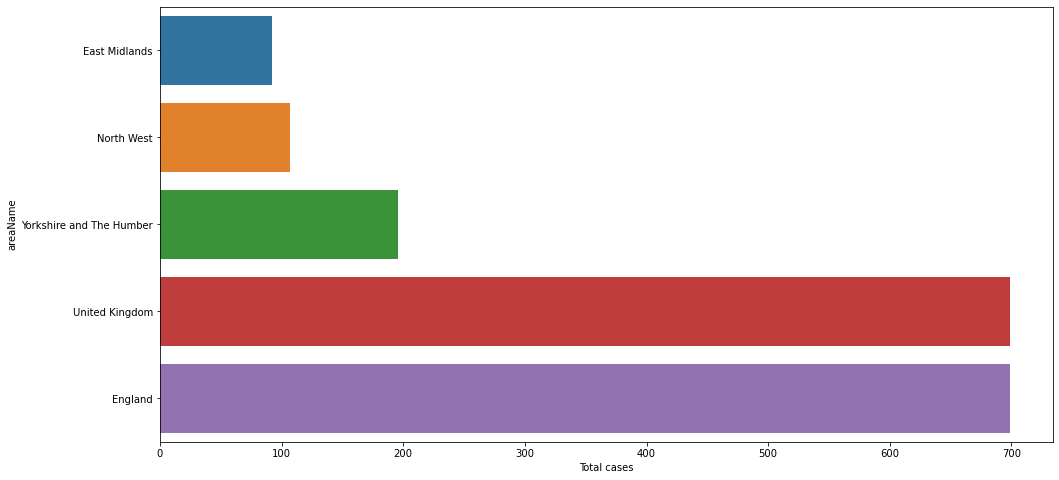

In [16]:
# Top 5 areas with the highest total cases over a given date 
print("Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.")
date2 = input()
df2 = df.loc[df['date'] == date2]
df2 = df2.sort_values('Total cases')

x = df2['Total cases'].tail()
y = df2['areaName'].tail()

fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x,y,ax=ax)
plt.show()

In [20]:
# Total cases over the 2020 year for the given places
print("Please enter a list of places. eg: North West, England, East Midlands")
list_area = list(input().split(", "))
df_new = pd.DataFrame()
for i in list_area:
    df_new = df_new.append(df[df['areaName'] == i]) 
df_new.head()

fig = px.line(df_new, x="date", y="Total cases", color='areaName', 
        height=600, title="Total cases", 
        color_discrete_sequence = px.colors.cyclical.mygbm)
fig.update_layout(showlegend=True)
fig.show()
print("If the desired results were not obtained, make sure there is a space after each comma.")

Please enter a list of places. eg: North West, England, East Midlands
North West, England, East Midlands
If the desired results were not obtained, make sure there is a space after each comma.


In [21]:
#  Total cases across UK over months
df_group = df
df['month'] = pd.DatetimeIndex(df['date']).month

new_df = df_group.groupby(["month"]).sum()
new_df['months'] = [i for i in range(1,12)]

fig = px.line(new_df, x="months", y="Total cases", 
        height=600, title="Total cases", 
        color_discrete_sequence = px.colors.cyclical.mygbm)
fig.update_layout(showlegend=True)
fig.show()

Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.
2020-06-12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



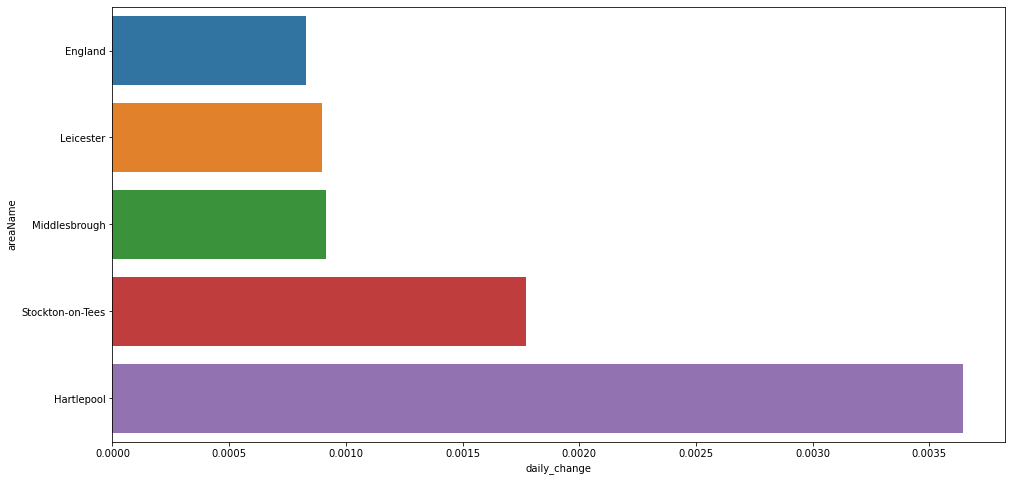

In [22]:
# Top 5 places with the greatest daily change over a given date
print("Please enter a date, in the yyyy-mm-dd format. Kindly note as 2020's data have been considered. Only that can be taken as input in the year.")
date3 = input()
df1_new = df.loc[df['date'] == date3]
df1_new = df1_new.sort_values('daily_change')

x = df1_new['daily_change'].tail()
y = df1_new['areaName'].tail()

fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x,y,ax=ax)
plt.show()

In [24]:
# daily change over the entire year for the given places
print("Please enter a list of places. eg: North West, England, East Midlands")
list_area2 = list(input().split(", "))
df_new2 = pd.DataFrame()
for i in list_area2:
    df_new2 = df_new2.append(df[df['areaName'] == i]) 
df_new2.head()

fig = px.line(df_new2, x="date", y="daily_change", color='areaName', 
        height=600, title="daily_change", 
        color_discrete_sequence = px.colors.cyclical.mygbm)
fig.update_layout(showlegend=True)
fig.show()
print("If the desired results were not obtained, make sure there is a space after each comma.")

Please enter a list of places. eg: North West, England, East Midlands
North West, England, East Midlands


If the desired results were not obtained, make sure there is a space after each comma.
